## Ejercicio para tus Alumnos: Regresión y Clasificación con el Dataset de Bike Sharing

### Instrucciones Generales
- Descarga el dataset de Bike Sharing de la UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
- Explora y prepara los datos
- Desarrolla un modelo de regresión para predecir el número de alquileres
- Desarrolla un modelo de clasificación para predecir categorías de demanda
- Evalúa y compara ambos modelos

### Ejercicio de Regresión

#### Carga y exploración inicial de datos
1. Cargar el dataset
2. Explorar la estructura de los datos (shape, info, describe)
3. Visualizar la distribución de alquileres de bicicletas
4. Analizar correlaciones entre variables
#### Preprocesamiento de datos
5. Manejar valores nulos si existen
6. Codificar variables categóricas (día de la semana, temporada, etc.)
7. Normalizar variables numéricas
8. Dividir en conjuntos de entrenamiento y prueba
#### Construcción del modelo de regresión
9. Diseñar la arquitectura de la red neuronal
10. Configurar hiperparámetros iniciales
11. Compilar el modelo usando la función de pérdida adecuada para regresión (MSE)
12. Implementar callbacks (EarlyStopping, ReduceLROnPlateau)
#### Entrenamiento y evaluación
13. Entrenar el modelo
14. Visualizar las curvas de aprendizaje
15. Evaluar en el conjunto de prueba (MSE, MAE, R²)
16. Visualizar predicciones vs valores reales
#### Optimización
17. Ajustar hiperparámetros (tasa de aprendizaje, arquitectura, etc.)
18. Probar diferentes combinaciones de características
19. Implementar regularización si es necesario
20. Pasos Detallados para el Ejercicio de Clasificación


### Problema de Clasificación
1. Crear categorías basadas en el número de alquileres (por ejemplo, 'baja', 'media', 'alta')
2. Visualizar la distribución de las clases
#### Preparación de datos para clasificación
3. Codificar la variable objetivo (one-hot encoding)
4. Asegurar balance de clases o implementar técnicas para manejar desbalance
#### Construcción del modelo de clasificación
5. Diseñar la arquitectura de la red neuronal (similar a la de regresión pero con ajustes)
6. Usar activación softmax en la capa de salida
7. Compilar con función de pérdida categorical_crossentropy
8. Añadir métricas de clasificación (accuracy, precision, recall)
#### Entrenamiento y evaluación
9. Entrenar el modelo de clasificación
10. Visualizar la matriz de confusión
11. Calcular métricas por clase (precision, recall, F1-score)
12. Generar curva ROC para problemas multiclase
#### Optimización y comparación
13. Ajustar hiperparámetros
14. Comparar con otros algoritmos de clasificación
15. Evaluar importancia de características


In [21]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2025-03-26 13:06:52.588442: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df= pd.read_csv('/Users/isaromobru/Desktop/DS102024_/3-MachineLearning/7-DeepLearning/1-RNN/Practica/day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df.shape

(731, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
df.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windsp

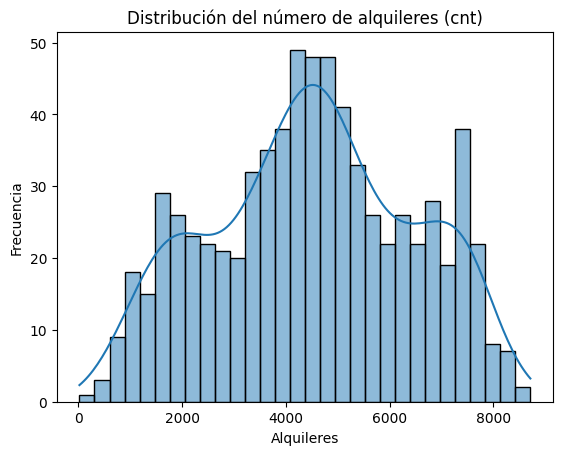

In [14]:
# Distribución de la variable objetivo: count
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribución del número de alquileres (cnt)")
plt.xlabel("Alquileres")
plt.ylabel("Frecuencia")
plt.show()

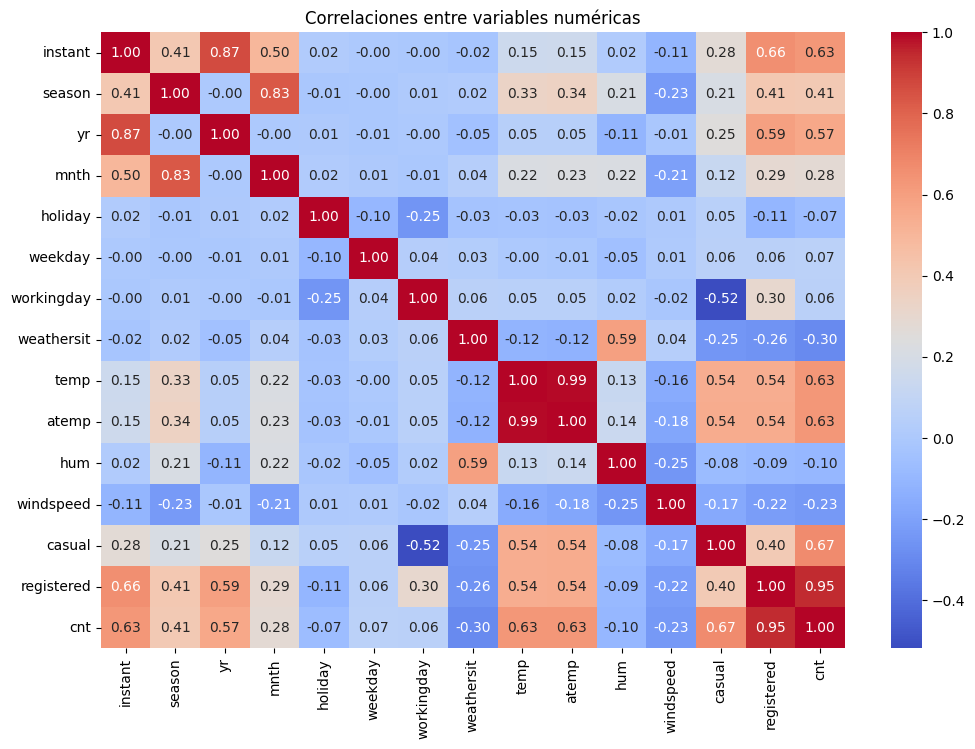

In [16]:
# Eliminar columnas no numéricas antes de correlacionar
df_numeric = df.select_dtypes(include=['number'])

# Ahora sí, mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlaciones entre variables numéricas")
plt.show()


In [17]:
print(df.isnull().sum()) 


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [18]:
# Variables categóricas ya están codificadas como números, pero podemos tratarlas como `category` si es útil
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_features:
    df[col] = df[col].astype("category")


### Codificación

In [19]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)


### División

In [22]:
from sklearn.model_selection import train_test_split

# Vamos a predecir 'cnt'
X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])  # quitamos columnas que no queremos usar
y = df['cnt']
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


se borra instant porque es un Id, dtday porque es una fecha y no tiene sentido, casual y registered parte del total y sesgaria la prediccion

In [23]:
# Definir modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Salida única para regresión
])

/Users/isaromobru/Desktop/DS102024_/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(
    optimizer='adam',
    loss='mse',              # Función de pérdida para regresión
    metrics=['mae']          # Podemos monitorear MAE también
)


In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)


In [26]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 25253796.0000 - mae: 4643.1411 - val_loss: 22504020.0000 - val_mae: 4332.6304 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24393066.0000 - mae: 4576.2944 - val_loss: 22493144.0000 - val_mae: 4331.2617 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24263424.0000 - mae: 4537.6611 - val_loss: 22477462.0000 - val_mae: 4329.3530 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24670374.0000 - mae: 4603.8984 - val_loss: 22454510.0000 - val_mae: 4326.6328 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25026994.0000 - mae: 4598.2441 - val_loss: 22421242.0000 - val_mae: 4322.7822 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23953848.0000 - mae: 4513.5703 - val_loss: 22375044.0000 - val_mae: 4317.5298 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━

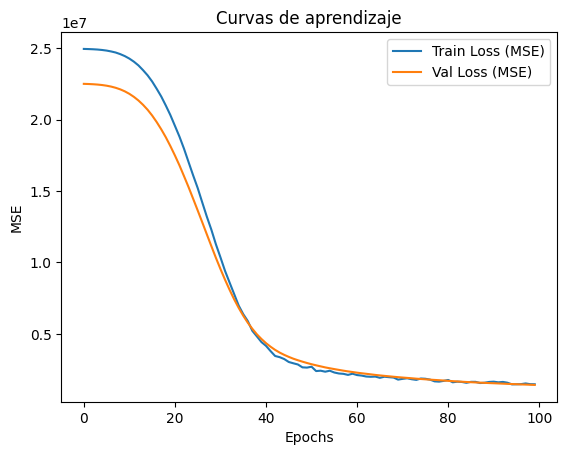

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Curvas de aprendizaje')
plt.legend()
plt.show()


La pérdida de entrenamiento y validación (MSE) disminuye de forma suave y constante.
No hay signos de sobreajuste (overfitting), ya que ambas curvas se mantienen bastante juntas.

In [28]:
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
MSE: 1327584.62
MAE: 862.96
R²: 0.67


MSE: 1,327,584	Aún alto, pero razonable para conteos en miles

MAE:	862.96	Error medio de 863 alquileres

R²:	0.67	El modelo explica el 67% de la varianza del total de alquileres 

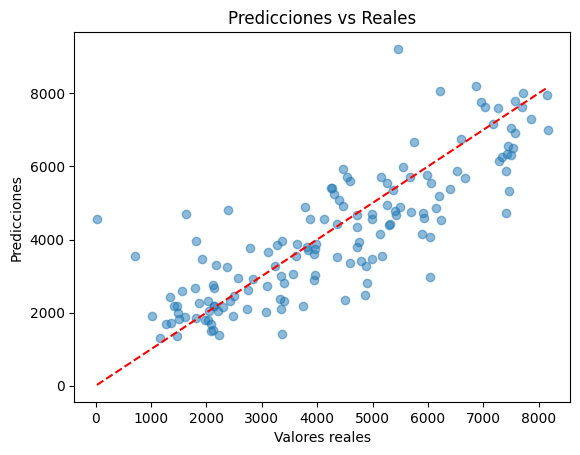

In [29]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Reales')
plt.show()


El gráfico muestra una buena alineación con la diagonal roja (predicción ideal).

In [30]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0005),  # antes era 0.001
    loss='mse',
    metrics=['mae']
)

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=8)
X_new = selector.fit_transform(X_scaled, y)

# Entrenar de nuevo con estas 8 mejores features
X_new

array([[-1.34821315, -1.00136893, -1.60016072, ..., -0.67994602,
         1.25017133, -0.38789169],
       [-1.34821315, -1.00136893, -1.60016072, ..., -0.74065231,
         0.47911298,  0.74960172],
       [-1.34821315, -1.00136893, -1.60016072, ..., -1.749767  ,
        -1.33927398,  0.74663186],
       ...,
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.42434419,
         0.87839173, -0.85355213],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.49004895,
        -1.01566357,  2.06944426],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.54048197,
        -0.35406086, -0.46020122]])

In [33]:
from tensorflow.keras.regularizers import l2

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(1)
])


In [34]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [35]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 23988654.0000 - mae: 4519.2397 - val_loss: 22510648.0000 - val_mae: 4333.5405 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24594816.0000 - mae: 4605.6230 - val_loss: 22502636.0000 - val_mae: 4332.5625 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24048840.0000 - mae: 4515.7676 - val_loss: 22491142.0000 - val_mae: 4331.1855 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25232362.0000 - mae: 4662.5469 - val_loss: 22474306.0000 - val_mae: 4329.2310 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25411352.0000 - mae: 4661.8569 - val_loss: 22450136.0000 - val_mae: 4326.4741 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24363026.0000 - mae: 4531.8481 - val_loss: 22416736.0000 - val_mae: 4322.7476 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━

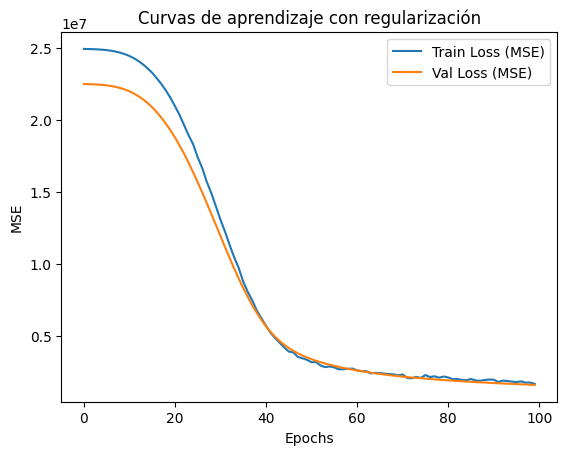

In [36]:
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Curvas de aprendizaje con regularización')
plt.legend()
plt.show()


In [37]:
y_pred = model.predict(X_test).flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MSE: 1416503.12
MAE: 901.06
R²: 0.65


El modelo empeora con las modificaciones

## Clasificación

In [38]:
# Agrupar la demanda en 3 categorías iguales: baja, media y alta
df['demand_level'] = pd.qcut(df['cnt'], q=3, labels=['baja', 'media', 'alta'])


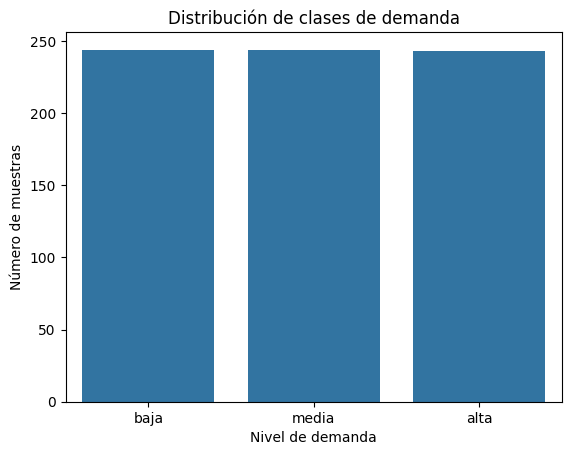

In [39]:


sns.countplot(x='demand_level', data=df)
plt.title("Distribución de clases de demanda")
plt.xlabel("Nivel de demanda")
plt.ylabel("Número de muestras")
plt.show()


In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_class = le.fit_transform(df['demand_level'])  # 0, 1, 2
y_class_cat = to_categorical(y_class)  # one-hot


In [41]:
## Comprobación de balanceo 

unique, counts = np.unique(y_class, return_counts=True)
for label, count in zip(le.classes_, counts):
    print(f"{label}: {count} muestras")


alta: 243 muestras
baja: 244 muestras
media: 244 muestras


Esta muy balanceado por lo que no hace falta poner otras metricas

In [42]:
# Arquitectura
model_class = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases
])

/Users/isaromobru/Desktop/DS102024_/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Compilar
model_class.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [44]:
# Entrenamiento y evaluacion

# Reutilizamos las features del modelo de regresión
X_class = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt', 'demand_level'])
X_class_scaled = StandardScaler().fit_transform(X_class)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class_scaled, y_class_cat, test_size=0.2, random_state=42)

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_class = model_class.fit(
    X_train_c, y_train_c,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3741 - loss: 1.1328 - val_accuracy: 0.7179 - val_loss: 0.9771
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5746 - loss: 0.9648 - val_accuracy: 0.8291 - val_loss: 0.8510
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6804 - loss: 0.8717 - val_accuracy: 0.7521 - val_loss: 0.7494
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7481 - loss: 0.7742 - val_accuracy: 0.7778 - val_loss: 0.6596
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7325 - loss: 0.6985 - val_accuracy: 0.7607 - val_loss: 0.5949
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7927 - loss: 0.5876 - val_accuracy: 0.7778 - val_loss: 0.5384
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7840 - loss: 0.5658 - val_accuracy: 0.7778 - val_loss: 0.5059
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7412 - loss: 0.5665 - val_accuracy: 0.78

## MAtriz de confusión

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


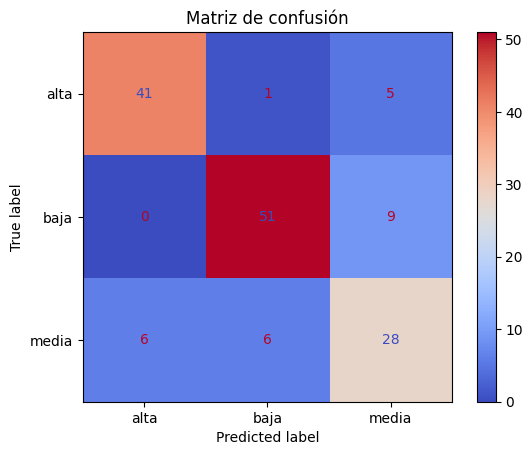

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model_class.predict(X_test_c)
y_pred_labels = y_pred_probs.argmax(axis=1)
y_true_labels = y_test_c.argmax(axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap='coolwarm')
plt.title("Matriz de confusión")
plt.show()


Clase "alta"
- 41 correctamente predichas como "alta"
- 6 errores: 1 como "baja", 5 como "media"

Clase "baja"
- 51 bien clasificadas como "baja"
- 9 mal clasificadas como "media"
- 0 confundidas con "alta"

Clase "media"
- Solo 28 clasificadas correctamente
- Pero 12 mal clasificadas:6 como "alta" y 6 como "baja".

Aquí es donde el modelo falla más. Las clases "media" parecen solaparse con las otras dos.


## Clasification report

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_true_labels, y_pred_labels, target_names=le.classes_))


              precision    recall  f1-score   support

        alta       0.87      0.87      0.87        47
        baja       0.88      0.85      0.86        60
       media       0.67      0.70      0.68        40

    accuracy                           0.82       147
   macro avg       0.81      0.81      0.81       147
weighted avg       0.82      0.82      0.82       147



## Curva ROC

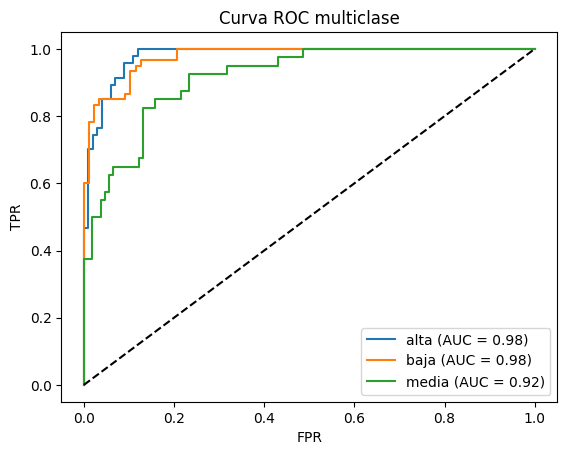

In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convertimos etiquetas para curva ROC
y_test_bin = label_binarize(y_true_labels, classes=[0, 1, 2])
y_pred_bin = y_pred_probs

# Curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfico
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC multiclase')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()


 A pesar de que "media" es la clase con menor F1-score, su AUC de 0.92 sigue siendo muy alto, lo que indica que el modelo sí captura bien su probabilidad, pero puede tener dificultad al momento de tomar la decisión final (quizás por umbral o similitud).
Las clases "alta" y "baja" están muy bien separadas, tanto en probabilidad como en clasificación.

## Otro modelo de clasificación: Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_c, y_train_c.argmax(axis=1))
rf_preds = rf.predict(X_test_c)

print("Random Forest:")
print(classification_report(y_true_labels, rf_preds, target_names=le.classes_))


Random Forest:
              precision    recall  f1-score   support

        alta       0.89      0.87      0.88        47
        baja       0.91      0.87      0.89        60
       media       0.68      0.75      0.71        40

    accuracy                           0.84       147
   macro avg       0.83      0.83      0.83       147
weighted avg       0.84      0.84      0.84       147



Se puede observar mejoras en comparación con el modelo anterior

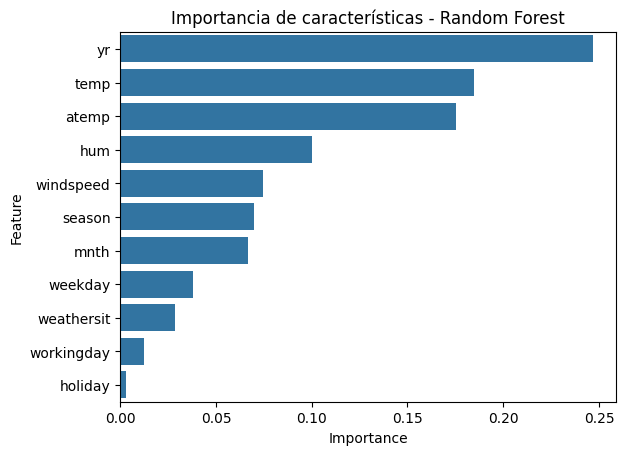

In [52]:
import pandas as pd

importances = rf.feature_importances_
feature_names = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt', 'demand_level']).columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Importancia de características - Random Forest")
plt.show()


- yr (año) — ~25% de importancia: Esto indica que el año en que ocurrió la observación (2011 o 2012) tiene un gran impacto..Puede deberse al crecimiento del servicio de bicicletas entre años.

- temp y atemp — ambas muy fuertes (~18%). Las condiciones de temperatura influyen mucho en la demanda Aparentemente ambas tienen valor, aunque están correlacionadas.

- hum (humedad) — aporta notablemente también